# Amplitude Modulation test
- https://www.allaboutcircuits.com/textbook/radio-frequency-analysis-design/radio-frequency-modulation/amplitude-modulation-theory-time-domain-frequency-domain/  

In [1]:
import os, sys

def gen_relative_path(target_path): 
    
    def del_same_parents(target_path, current_path):
        if len(target_path) * len(current_path) > 0:
            if target_path[0] == current_path[0]:
                target_path.pop(0)
                current_path.pop(0)
                del_same_parents(target_path, current_path)
            
    current_path = os.getcwd().replace('\\', '/').split('/')
    target_path = target_path.replace('\\', '/').split('/')
    del_same_parents(target_path, current_path)
    
    return ['..'] * len(current_path) + target_path


def append_source_relative_path(source_relative_path):
    sys.path.append(os.sep.join(source_relative_path))

In [2]:
# paths = ['']
# paths = [gen_relative_path(p) for p in paths]
# print(paths)

In [3]:
paths = [['..', '..', '..', '..', '..', 'Waves', 'bitbucket', 'github', 'codes'],
         ['..', 'codes']]

for path in paths:
    append_source_relative_path(path)

In [4]:
%pylab inline

from waves.sound import *
from waves.tools.dsp.mixers.modulators.analog import *

Populating the interactive namespace from numpy and matplotlib


In [5]:
import warnings 

warnings.filterwarnings('ignore')

In [6]:
def show_pair(sig_left, sig_right, frames = 300):
    sig_left.show(color = 'red', show_frames = slice(0, frames))
    sig_right.show(color = 'green', show_frames = slice(0, frames))
    plt.xticks(rotation = 45)    

## LO

In [7]:
phase_shift = PI2 / 8

In [8]:
freq_lo = int(100e3)

freq_sampling = freq_lo * 8 * 2

In [9]:
duration_seconds = 1
t = np.linspace(0, duration_seconds, duration_seconds * freq_sampling)

## IF

In [10]:
freq_if = 1000

### QPSK

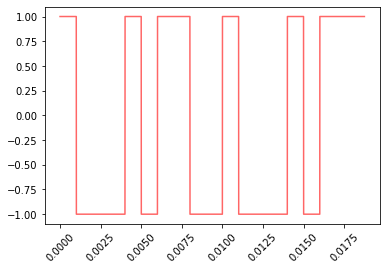

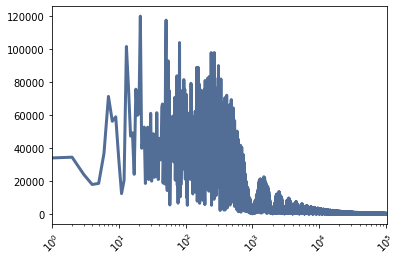

In [25]:
freq_if = 1000

def gen_bitstream(freq, ts):
    bs = np.zeros(ts.shape)
    bs[:] = 1
    n = ts.shape[-1]
    for i in range(1, n):
        if int(freq * ts[i ] ) > int(freq * ts[i -1] ) :
            bs[i] = random.choice((-1, 1))
        else :
            bs[i] = bs[i-1]
    return bs

# show_frames = 3000
# amp = FrequencyMixer(freq_if, np.cos).gen_channel(t)
# amp.show(color = 'red', show_frames = slice(0, show_frames))

show_frames = 30000
amp = Channel(gen_bitstream(freq_if, t), ts = t, framerate = freq_sampling)
amp.show(color = 'red', show_frames = slice(0, show_frames))
 
plt.xticks(rotation = 45);
plt.figure()
amp.make_spectrum().plot(freq_lims = (1, freq_lo + freq_if * 2))
plt.xticks(rotation = 45);

## Modulation

## 用 $cosine$ 訊號做 shifter:
- IF 被 shift 到 以 LO頻率 為中心的 正負 IF頻率
- new frequency = (freq_IF - freq_LO) + (freq_IF + freq_LO)，能量均分  

#### 三角函數的乘法:  

$
\begin{align}
 \sin(x) \cos(y) &= (1/2) [\sin(x+y) + \sin(x-y)] \\ 
 \cos(x) \sin(y) &= (1/2) [\sin(x+y) - \sin(x-y)] \\ 
 \cos(x) \cos(y) &= (1/2) [\cos(x-y) + \cos(x+y)] \\ 
 \sin(x) \sin(y) &= (1/2) [\cos(x-y) - \cos(x+y)] \\  
\end{align}
$  

####  用 cosine 訊號 對 exp 訊號 做 shifter:  

$
\begin{align}
 \cos({\omega_1 t}) \cdot e^{j\omega_2 t} &= \cos(\omega_1 t) \cdot (\cos(\omega_2 t) + j\sin(\omega_2 t)) \\ 
 &= \cos(\omega_1 t) \cos(\omega_2 t) + j\cos(\omega_1 t)\sin(\omega_2 t) \\ 
 &= \frac{1}{2} (\cos((\omega_1 - \omega_2) t) + \cos((\omega_1 + \omega_2) t)) + \frac{1}{2}j \cdot(\sin((\omega_1 + \omega_2) t) -\sin((\omega_1 - \omega_2) t))) \\ 
 &= \frac{1}{2} (\cos((\omega_1 - \omega_2) t) -j\sin((\omega_1 - \omega_2) t) + \cos((\omega_1 + \omega_2) t)) + j\sin((\omega_1 + \omega_2) t) ) \\ 
 &= \frac{1}{2} ((\cos((\omega_1 - \omega_2) t) -j\sin((\omega_1 - \omega_2) t)) + (\cos((\omega_1 + \omega_2) t)) + j\sin((\omega_1 + \omega_2) t))) \\ 
 &= \frac{1}{2} (e^{j(\omega_2 - \omega_1) t} + e^{j(\omega_2 + \omega_1) t}) \\ 
 &= \frac{1}{2} e^{j(\omega_2 - \omega_1) t} + \frac{1}{2}e^{j(\omega_2 + \omega_1) t} \\ 
   e^{j\omega_2 t} \cdot \cos({\omega_1 t}) &= (\cos(\omega_2 t) + j\sin(\omega_2 t)) \cdot  \cos(\omega_1 t) \\ 
 &= \cos(\omega_2 t) \cos(\omega_1 t) + j\sin(\omega_2 t)\cos(\omega_1 t) \\ 
 &= \frac{1}{2} (\cos((\omega_2 - \omega_1) t) + \cos((\omega_2 + \omega_1) t)) + \frac{1}{2}j \cdot(\sin((\omega_2 + \omega_1) t) +\sin((\omega_2 - \omega_1) t))) \\ 
 &= \frac{1}{2} (\cos((\omega_2 - \omega_1) t) + j\sin((\omega_2 - \omega_1) t) + \cos((\omega_2 + \omega_1) t)) + j\sin((\omega_2 + \omega_1) t) ) \\ 
 &= \frac{1}{2} ((\cos((\omega_2 - \omega_1) t) + j\sin((\omega_2 - \omega_1) t)) + (\cos((\omega_2 + \omega_1) t)) + j\sin((\omega_2 + \omega_1) t))) \\ 
 &= \frac{1}{2} (e^{j(\omega_2 - \omega_1) t} + e^{j(\omega_2 + \omega_1) t}) \\ 
 &= \frac{1}{2} e^{j(\omega_2 - \omega_1) t} + \frac{1}{2}e^{j(\omega_2 + \omega_1) t} \\ 
 &= \cos({\omega_1 t}) \cdot e^{j\omega_2 t}
\end{align}
$

exp 訊號的頻率必須比 cosine 訊號的頻率高 ($\omega_2 > \omega_1$)，才會在正頻譜出現兩條頻率，否則有一條頻率會出現在 負頻譜區。  

In [26]:
am = AmplitudeModulator(freq = freq_lo)#, fun = np.cos)

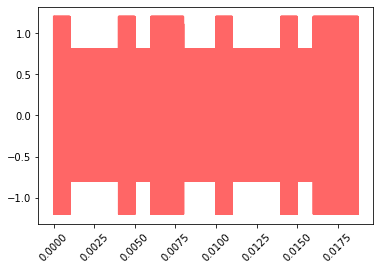

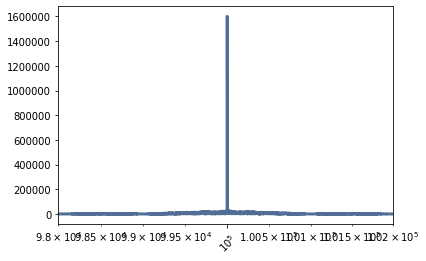

In [27]:
modulation_index = 0.2
RF = am.modulate(amp, modulation_index = modulation_index)

RF.show(color = 'red', show_frames = slice(0, show_frames))
# amp.show(color = 'green', show_frames = slice(0, show_frames))
plt.xticks(rotation = 45);
plt.figure()
RF.make_spectrum().plot(freq_lims = (freq_lo - freq_if * 2 , freq_lo + freq_if * 2))
plt.xticks(rotation = 45);

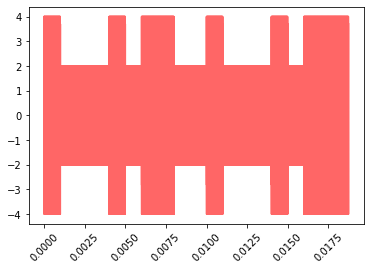

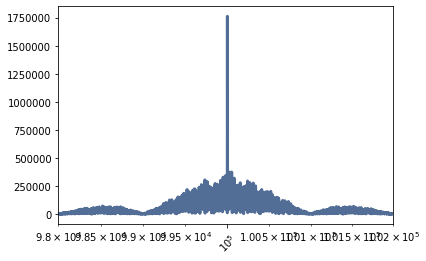

In [28]:
modulation_index = 3
RF = am.modulate(amp, modulation_index = modulation_index)

RF.show(color = 'red', show_frames = slice(0, show_frames))
plt.xticks(rotation = 45);
plt.figure()
RF.make_spectrum().plot(freq_lims = (freq_lo - freq_if * 2 , freq_lo + freq_if * 2))
plt.xticks(rotation = 45);

## De-modulation

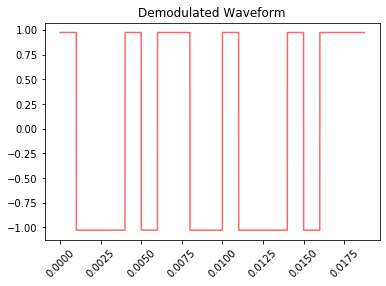

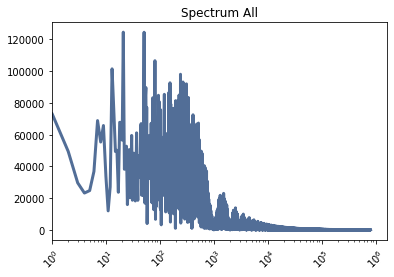

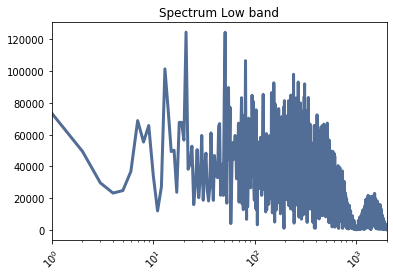

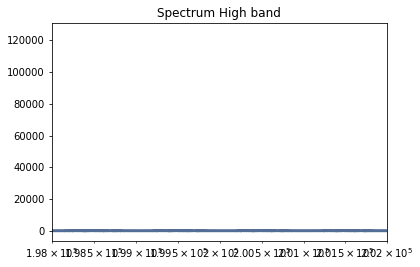

In [29]:
amp_restored = am.demodulate(RF, 
                             modulation_index = modulation_index,
                             remove_dc = True)#, low_pass_cutoff = freq_if * 2) 

amp_restored.show(color = 'red', show_frames = slice(0, show_frames))
plt.title('Demodulated Waveform')
plt.xticks(rotation = 45);
plt.figure()
plt.title('Spectrum All')
amp_restored.make_spectrum().plot(freq_lims = (1, freq_sampling)) 
plt.xticks(rotation = 45);
plt.figure()
plt.title('Spectrum Low band')
amp_restored.make_spectrum().plot(freq_lims = (1, freq_if * 2)) 
plt.xticks(rotation = 45);
plt.figure()  
plt.title('Spectrum High band')
amp_restored.make_spectrum().plot(freq_lims = (2*freq_lo - freq_if * 2, 2*freq_lo + freq_if * 2)) 
plt.xticks(rotation = 45); 

## Validate

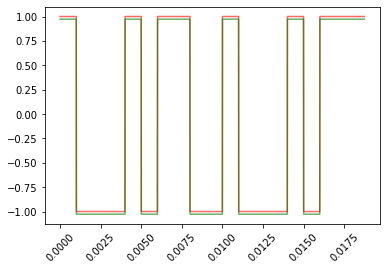

In [30]:
amp.show(color = 'red', show_frames = slice(0, show_frames))
# plt.xticks(rotation = 45);
# plt.figure()
amp_restored.show(color = 'green', show_frames = slice(0, show_frames))
plt.xticks(rotation = 45);